In [366]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [367]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.dot(np.linalg.inv(np.dot(tx.T, tx)), np.dot(tx.T,y))
    e = y - np.dot(tx, w)
    mse = np.dot(e.T,e)/2/np.size(y)
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [368]:
from helpers import *
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    print(tx)
    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    print("Percentage difference between LS and Grid Weights")
    return 100*np.abs((least_squares(y,tx)[1][:]
            - np.array([w0_star, w1_star])[:])/least_squares(y,tx)[1][:])

Test it here

In [369]:
test_your_least_squares()

[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ..., 
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]
Percentage difference between LS and Grid Weights


array([ 0.77311905,  1.16212569])

In [370]:
height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = weight[:7], build_poly(x, 2)[:7,:7]
least_squares(y, tx)

(12.36241713310439, array([ 55.8863815 ,  49.38423757, -12.89684154]))

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [400]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [372]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    num_samples = len(x)
    ones = np.array([np.ones(num_samples)])
    pol = np.asarray([x**power for power in range(1,degree+1)])
    return np.concatenate((ones, pol), axis=0).T

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [373]:
#from costs import compute_mse
from plots import *

def compute_mse(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - np.dot(tx, w)
    return np.dot(np.transpose(e), e)/2/np.size(y)

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        tx = build_poly(x, degree)
        print(tx)
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        
        # ***************************************************
        mse, weights = least_squares(y, tx)
        rmse = np.sqrt(2*mse)
        # least square and calculate RMSE: TODO
        # ***************************************************
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

[[ 1.          0.35237491]
 [ 1.          4.8951233 ]
 [ 1.          1.86662437]
 [ 1.          3.50706129]
 [ 1.          3.38087384]
 [ 1.          0.73093728]
 [ 1.          3.88562366]
 [ 1.          5.65224803]
 [ 1.          6.28318531]
 [ 1.          2.37137419]
 [ 1.          0.60474982]
 [ 1.          3.63324875]
 [ 1.          0.85712473]
 [ 1.          2.49756165]
 [ 1.          1.61424946]
 [ 1.          5.39987312]
 [ 1.          6.15699785]
 [ 1.          6.0308104 ]
 [ 1.          0.47856237]
 [ 1.          2.87612401]
 [ 1.          4.51656093]
 [ 1.          0.98331219]
 [ 1.          1.10949964]
 [ 1.          0.1       ]
 [ 1.          2.11899928]
 [ 1.          1.36187455]
 [ 1.          4.01181111]
 [ 1.          5.77843549]
 [ 1.          4.26418602]
 [ 1.          1.2356871 ]
 [ 1.          2.24518674]
 [ 1.          1.99281183]
 [ 1.          1.48806201]
 [ 1.          4.64274839]
 [ 1.          4.39037348]
 [ 1.          3.00231147]
 [ 1.          0.22618746]
 

/Users/Francisco/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


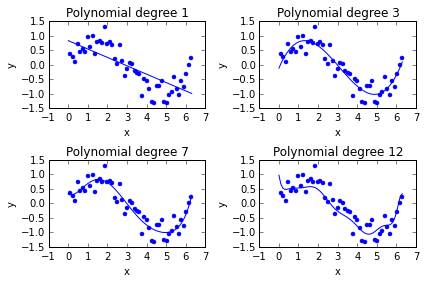

In [374]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [375]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    x_y = np.c_[(x,y)]
    #print(x_y)
    Ntrain = int(np.size(y)*ratio)
    np.random.shuffle(x_y)
    #print(x_y)
    return x_y.T[0][:Ntrain], x_y.T[1][:Ntrain], x_y.T[0][Ntrain:], x_y.T[1][Ntrain:]

In [376]:
x, y = load_data()

Then, test your `split_data` function below.

In [377]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    xtrain, ytrain, xtest, ytest = split_data(x, y, ratio)
    tx_train = build_poly(xtrain, degree)
    tx_test = build_poly(xtest, degree)
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    mse_train, weights_train = least_squares(ytrain, tx_train)
    e = ytest - np.dot(tx_test, weights_train)
    mse_test = np.dot(e.T,e)/2/np.size(ytest)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    rmse_tr = np.sqrt(2*mse_train)
    rmse_te = np.sqrt(2*mse_test)
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [378]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
proportion=0.9, degree=12, Training RMSE=0.887, Testing RMSE=0.723
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
proportion=0.5, degree=12, Training RMSE=1.129, Testing RMSE=1.058
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
proportion=0.1, degree=7, Training RMSE=0.914, Testing RMSE=1.884
proportion=0.1, degree=12, Training RMSE=5.435, Testing RMSE=247.714


# 3 Ridge Regression
Please fill in the function below.

In [426]:
def ridge_regression_fra(y, tx, lambda_):
    """implement ridge regression."""
    w = np.dot(np.linalg.inv(np.dot(tx.T, tx) + lambda_/2/np.size(y)*np.identity(np.size(tx[0,:]))), np.dot(tx.T,y))
    e = y - np.dot(tx, w)
    loss = np.dot(e.T,e)/2/np.size(y)
    return loss, w

In [431]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    xtrain, ytrain, xtest, ytest = split_data(x, y, ratio)
    #print(xtrain, ytrain, xtest, ytest)
    # split the data, and return train and test data: TODO
    # ***************************************************
    # ***************************************************
    tx_train = build_poly(xtrain, degree)
    tx_test = build_poly(xtest, degree)
    # form train and test data with polynomial basis function: TODO
    # ***************************************************


    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        wtrain = ridge_regression(ytrain, tx_train, lambda_)[1:]
        rmse_tr.append(np.sqrt(2*ridge_regression(ytrain, tx_train, lambda_)[0]))
        e = ytest - np.dot(tx_test, wtrain[0]) #wtrain is a tuple!! je suis très ennuyé
        mse_test = np.dot(e.T,e)/2/np.size(y) #+ lambda_*np.dot(wtrain[0][1:],wtrain[0][1:])
        rmse_te.append(np.sqrt(2*mse_test))
        # ridge regression with a given lambda
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.218, Testing RMSE=0.237
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.218, Testing RMSE=0.237
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.218, Testing RMSE=0.237
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.218, Testing RMSE=0.237
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.218, Testing RMSE=0.237
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.218, Testing RMSE=0.237
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.219, Testing RMSE=0.236
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.219, Testing RMSE=0.234
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.219, Testing RMSE=0.231
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.220, Testing RMSE=0.227
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.221, Testing RMSE=0.225
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.224, Testing RMSE=0.226
proportion=0.5, degree=7, lambda=0.193, 

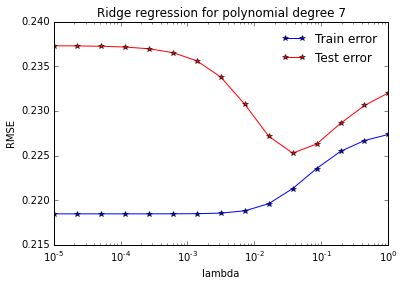

In [432]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)